# 이론적 배경
## 신경망 학습: Gradient Descent
임의로 정한 함수 $f$가 있고, 이 함수의 파라미터를 $\omega$라고 할때, 함수를 $f_{\omega}$ 형태로 표현할 수 있다.
또한, n개의 데이터는 (input, answer)의 형태로 이루어져있다.
$f_{\omega}$는 처음에는 데이터와 무관한 함수이지만 점점 데이터가 주는 정답과 $f_{\omega}$의 아웃풋 사이 차이를 최소화하도록 $\omega$가 업데이트된다. 조금씩 업데이트를 반복하며 $f_{\omega}$는 점점 데이터와 가깝게 지나가는 함수가 된다. 이러한 학습 과정에서 그라디언트 기반 방법을 사용한다.

# Pytorch를 활용한 신경망 학습 구현
실제 뉴럴넷은 함수가 매우 복잡하므로 직접 일일이 편미분을 구하기 힘들기 때문에, `tensorflow`나 `pytorch`의 **자동 미분** 라이브러리를 사용한다. 해당 라이브러리는 **역전파(Back propagation)** 알고리즘을 통해 복잡한 함수의 그라디언트를 매우 효율적이고 빠르게 계산한다.
역전파 알고리즘은 N개의 파라미터가 있을 때 N번 편미분하지 않고, 뒤에서부터 중간중간 미분 값을 캐싱했다가 재사용하여 효율적으로 그라디언트를 계산하는 방법론이다.

이제 `pytorch`로 신경망 학습을 구현해보자. 데이터를 생성해내는 함수 $F(x)$는 다음과 같다.
<center>
    $F(x) = cos(1.5 \pi * x) + x + \epsilon, \qquad \epsilon \sim U(-0.2, 0.2)$
</center>
단, 해당 함수는 실제로는 모르는 함수이며, 해당 함수가 만들어내는 데이터만 관찰 가능하다. 즉, 실제 세계와 마찬가지로 데이터를 만들어내는 본질적인 함수는 알 수 없지만 그것을 근사하는 것이 최종적인 목적이다.

피팅할 뉴럴 네트워크는 `Input → Hidden Layer1 → Hidden Layer2 → Hidden Layer3 → Output`과 같은 임의의 뉴럴넷 $f_{\omega}$를 사용한다. 각 레이어에는 $ReLU$라는 **활성 함수(Activation function)**가 포함되어 있다.

 ## 라이브러리 import

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Model 클래스

In [6]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(1, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)
    self.fc4 = nn.Linear(128, 1, bias = False)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

## 데이터 생성 함수 $F(x)$

In [7]:
def true_fun(X):
  noise = np.random.rand(X.shape[0]) * 0.4 - 0.2
  return np.cos(1.5 * np.pi * X) + X + noise

## Plotting 함수


In [8]:
def plot_results(model):
  x = np.linspace(0, 5, 100)
  input_x = torch.from_numpy(x). float ().unsqueeze(1)
  plt.plot(x, true_fun(x), label = "Truth")
  plt.plot(x, model(input_x).detach().numpy(), label = "Prediction")
  plt.legend(loc = 'lower right', fontsize = 15)
  plt.xlim((0, 5))
  plt.ylim((-1, 5))
  plt.grid()

## Main 함수

In [11]:
def main():
  data_x = np.random.rand(10000) * 5
  # 0~5 사이 숫자 1만개를 샘플링하여 인풋으로 사용
  model = Model()
  optimizer = optim.Adam(model.parameters(), lr = 0.001)

  for step in range(20000):
    batch_x = np.random.choice(data_x, 32)
    # 랜덤하게 뽑힌 32개의 데이터로 mini-batch를 구성
    batch_x_tensor = torch.from_numpy(batch_x). float().unsqueeze(1)
    pred = model(batch_x_tensor)

    batch_y = true_fun(batch_x)
    truth = torch.from_numpy(batch_y). float().unsqueeze(1)
    loss = F.mse_loss(pred, truth) # 손실 함수인 MSE를 계산

    optimizer.zero_grad()
    loss.mean().backward() # 역전파를 통한 그래디언트 계산
    optimizer.step() # 실제 파라미터 업데이트

  plot_results(model)

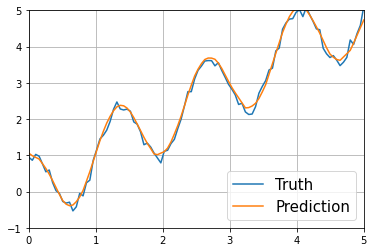

In [12]:
main()